In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import netCDF4 as nc
import xarray as xr
from matplotlib.pyplot import plot_date

In [2]:
netcdf_file = "/Users/iw2g24/PycharmProjects/SSH_project/dot_all_30bmedian_goco05c_sig3.nc"
xrds = xr.open_dataset(netcdf_file)
print(xrds)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/iw2g24/PycharmProjects/SSH_project/dot_all_30bmedian_goco05c_sig3.nc'

In [30]:
print(xrds['dot'])
print(xrds['ug'])
print(xrds['vg'])

<xarray.DataArray 'dot' (longitude: 360, latitude: 64, time: 196)> Size: 36MB
[4515840 values with dtype=float64]
Coordinates:
  * longitude  (longitude) float64 3kB -179.5 -178.5 -177.5 ... 178.5 179.5
  * latitude   (latitude) float64 512B -81.75 -81.25 -80.75 ... -50.75 -50.25
  * time       (time) datetime64[ns] 2kB 2002-07-01 2002-08-01 ... 2018-10-01
Attributes:
    units:      meters
    long_name:  dynamic_ocean_topography
<xarray.DataArray 'ug' (longitude: 360, latitude: 64, time: 196)> Size: 36MB
[4515840 values with dtype=float64]
Coordinates:
  * longitude  (longitude) float64 3kB -179.5 -178.5 -177.5 ... 178.5 179.5
  * latitude   (latitude) float64 512B -81.75 -81.25 -80.75 ... -50.75 -50.25
  * time       (time) datetime64[ns] 2kB 2002-07-01 2002-08-01 ... 2018-10-01
Attributes:
    units:      metres/second
    long_name:  zonal_surface_geostrophic_velocity
<xarray.DataArray 'vg' (longitude: 360, latitude: 64, time: 196)> Size: 36MB
array([[[      nan,       nan, ...,  

In [21]:
desired_date = '2018-10-01'
data_for_desired_date = xrds.sel(time=desired_date)
print(data_for_desired_date)

<xarray.Dataset> Size: 744kB
Dimensions:          (longitude: 360, latitude: 64, edge_lat: 65, edge_lon: 361)
Coordinates:
  * longitude        (longitude) float64 3kB -179.5 -178.5 ... 178.5 179.5
  * latitude         (latitude) float64 512B -81.75 -81.25 ... -50.75 -50.25
    time             datetime64[ns] 8B 2018-10-01
  * edge_lat         (edge_lat) float64 520B -82.0 -81.5 -81.0 ... -50.5 -50.0
  * edge_lon         (edge_lon) float64 3kB -180.0 -179.0 -178.0 ... 179.0 180.0
Data variables:
    dot              (longitude, latitude) float64 184kB ...
    ug               (longitude, latitude) float64 184kB ...
    vg               (longitude, latitude) float64 184kB nan nan ... 0.01467
    land_mask        (longitude, latitude) float64 184kB ...
    intersat_offset  float64 8B ...
Attributes:
    history:      Created 08/01/2022, 00:5223
    description:  ENVISAT + CryoSat2 altimetry (geoid:_goco05c) \nenv: 07.200...


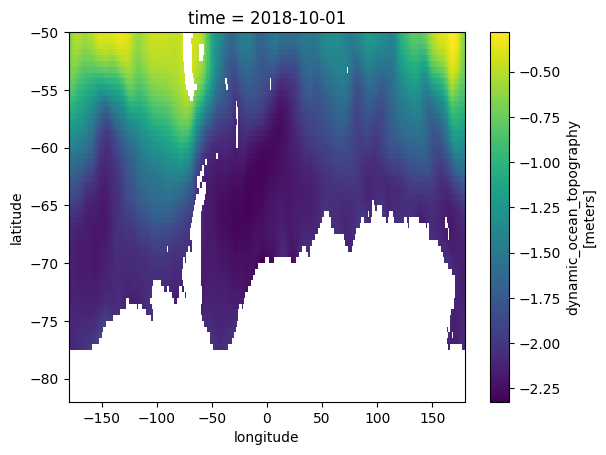

In [39]:
data_for_desired_date['dot'].plot(x='longitude')
plt.show()

In [40]:
import cartopy.crs as ccrs

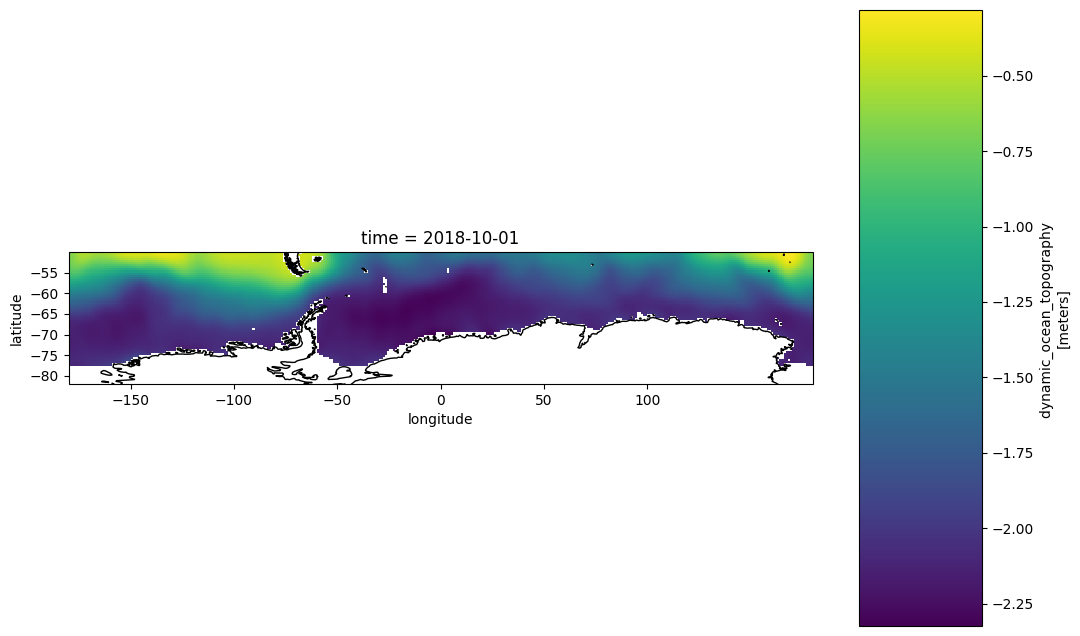

In [97]:
plt.figure(figsize=(12,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_yticks(range(-80,-50,5), crs=ccrs.PlateCarree())
ax.set_xticks(range(-150,150,50), crs=ccrs.PlateCarree())
ax.set_aspect('2')
plt_dot = data_for_desired_date['dot'].plot(x='longitude', cmap=plt.get_cmap('viridis'), ax=ax)

# Get 'long_name' and 'units' attributes from the data
long_name = data_for_desired_date['dot'].attrs.get('long_name', 'No long_name available')
units = data_for_desired_date['dot'].attrs.get('units', 'No units available')
colourbar_label = f"{long_name} \n[{units}]"

cbar = plt_dot.colorbar
# Modify the color bar label using 'long_name' attribute from data
cbar.set_label(colourbar_label)
# Change the color bar orientation to horizontal
cbar.ax.tick_params(axis='x')  # Ensures that the ticks align correctly for horizontal orientation
cbar.ax.set_box_aspect(5)  # Optional: Adjust the aspect ratio of the color bar

plt.show()